In [1]:
from scripts.get_data import get_processed_data
from scripts.models import VotingClassifier

In [2]:
# logistic regression
from sklearn.linear_model import LogisticRegression 
# elastic net 
from sklearn.linear_model import ElasticNet
# svm classifier
from sklearn.svm import SVC
# lda 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [3]:
data, labels = get_processed_data(var_thresh=0.01)

## Ensemble model

This uses an implementation of the ensemble model as described in the paper. This is so that we can use this as a baseline to make comparisons.

In [4]:
model = VotingClassifier(20, SVC(kernel='linear'))
model.train(data.values, labels)
predictions = model.predict(data.values)

In [5]:
from sklearn.metrics import mean_absolute_error, accuracy_score

mean_absolute_error(labels, predictions), accuracy_score(labels, predictions)

(0.0, 1.0)

We have 100% accuracy on the training data when the `N` different models are all `SVC()`. 

## Leave One Out scoring

In [13]:
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import mean_absolute_error, median_absolute_error

splitter = LeaveOneOut()
true_labels = []
pred_labels = []
base_estimator = SVC(kernel='linear') 

for fold, (train_ind, val_ind) in enumerate(splitter.split(data)):
    model = VotingClassifier(20, base_estimator)
    model.train(data.iloc[train_ind], labels.iloc[train_ind])
    pred = model.predict(data.iloc[val_ind]).reshape(-1,)
    true_labels.append(labels.iloc[val_ind].values[0])
    pred_labels.append(pred[0])
    print(f'[Fold {fold+1}/{splitter.get_n_splits(data)}] ==> True label: {true_labels[-1]}, Prediction: {pred_labels[-1]}')

[Fold 1/133] ==> True label: 19, Prediction: 25
[Fold 2/133] ==> True label: 19, Prediction: 19
[Fold 3/133] ==> True label: 19, Prediction: 84
[Fold 4/133] ==> True label: 19, Prediction: 25
[Fold 5/133] ==> True label: 20, Prediction: 21
[Fold 6/133] ==> True label: 20, Prediction: 68
[Fold 7/133] ==> True label: 31, Prediction: 16
[Fold 8/133] ==> True label: 31, Prediction: 32
[Fold 9/133] ==> True label: 32, Prediction: 12
[Fold 10/133] ==> True label: 32, Prediction: 70
[Fold 11/133] ==> True label: 33, Prediction: 19
[Fold 12/133] ==> True label: 33, Prediction: 20
[Fold 13/133] ==> True label: 37, Prediction: 33
[Fold 14/133] ==> True label: 37, Prediction: 33
[Fold 15/133] ==> True label: 37, Prediction: 72
[Fold 16/133] ==> True label: 39, Prediction: 82
[Fold 17/133] ==> True label: 51, Prediction: 86
[Fold 18/133] ==> True label: 52, Prediction: 82
[Fold 19/133] ==> True label: 55, Prediction: 13
[Fold 20/133] ==> True label: 57, Prediction: 48
[Fold 21/133] ==> True label:

In [14]:
import numpy as np

mean_error = mean_absolute_error(np.array(true_labels), np.array(pred_labels))
median_error = median_absolute_error(np.array(true_labels), np.array(pred_labels))
mean_error, median_error

(14.075187969924812, 6.0)

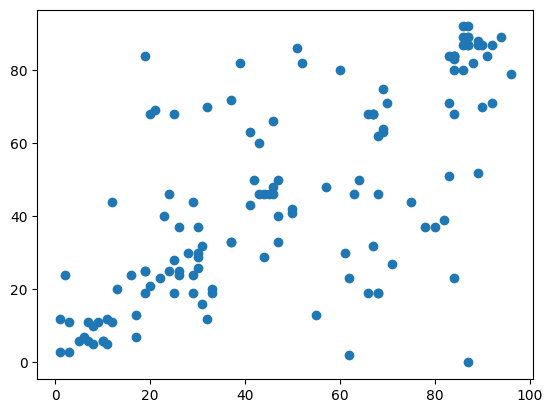

In [15]:
import matplotlib.pyplot as plt

plt.scatter(true_labels, pred_labels)

In [16]:
from sklearn.metrics import r2_score

r2_score(np.array(true_labels), np.array(pred_labels))

0.4071043591055318